In [25]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [26]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [27]:
# osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.metro.pbf"
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

In [28]:
s_e_coordinates = {
    's_coordinates_x': 4.8322048, 
    's_coordinates_y': 52.3872658, 
    'e_coordinates_x': 4.8931115, 
    'e_coordinates_y': 52.3802376
}

# Bus

In [29]:
bus_stations, bus_edges, bus_nodes, bus_routes = prepare_bus(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████| 71634/71634 [00:08<00:00, 8023.52it/s]


In [30]:
bus_routes = bus_routes.loc[bus_routes.network == 'Stadsvervoer Amsterdam']
bus_routes = bus_routes.loc[bus_routes.service != 'night']

In [31]:
bus_routes, check_name = check_bus_routes(bus_stations, bus_routes)

In [32]:
replacement_dict = {
    'Amsterdam, ': '',
    'Amsterdam': '',
    'Weesp Station': 'Station',
    'Osdorp De Aker': 'Matterhorn',
    'Schiphol, Airport/Plaza': 'Schiphol, Airport',
    'De Boelelaan': 'De Boelelaan/De Klencke'
}
replacement_dict1 = {
    'Amsterdam, ': '',
    'Amsterdam': '',
}

bus_stations['name'] = bus_stations['name'].replace(replacement_dict1, regex=True).str.strip()

bus_stations, bus_routes, check_name = recheck_bus_routes(replacement_dict, bus_stations, bus_routes)

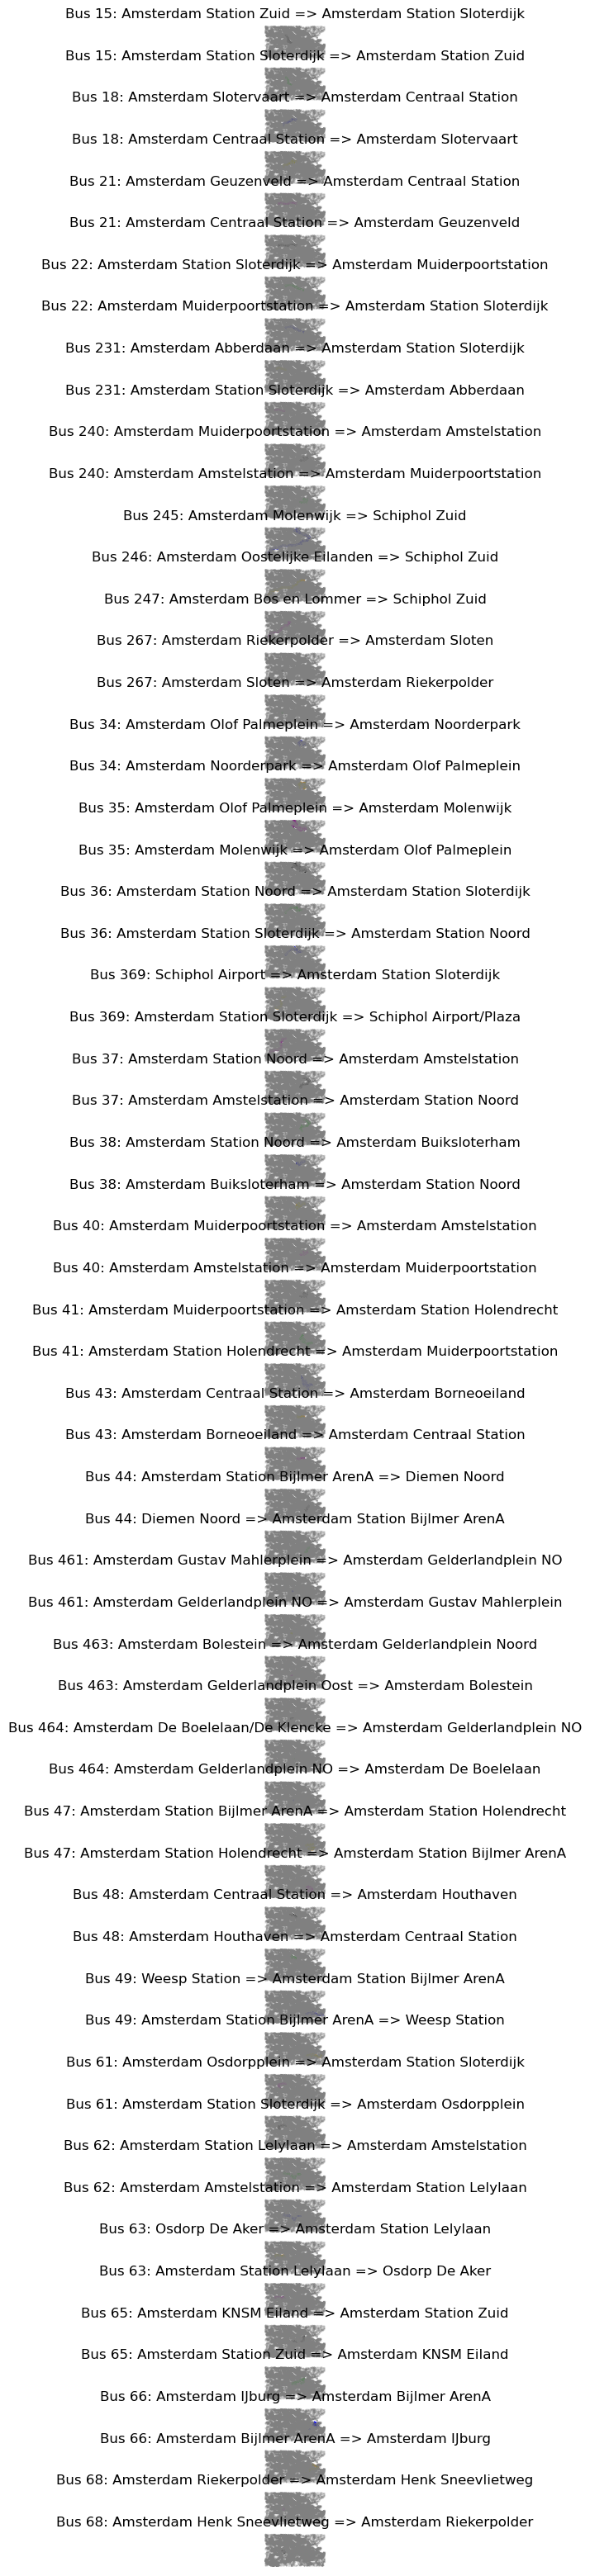

In [33]:
bus_order_route_dict, bus_shortest_path_pairs, bus_shortest_path_edges, bus_edges_dict = bus(bus_stations, bus_edges, bus_nodes, bus_routes, city='Amsterda,')

In [65]:
bus_shortest_path_edges

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':         osm_id                                           geometry  \
 0      7379505  LINESTRING (4.8437968 52.3782783, 4.8437477 52...   
 1      7379515  LINESTRING (4.8437069 52.3780337, 4.8436834 52...   
 2      7379536  LINESTRING (4.8444398 52.3818536, 4.8444628 52...   
 3      7379543  LINESTRING (4.8444657 52.3807531, 4.8443583 52...   
 4      8662467  LINESTRING (4.840192 52.3859065, 4.8401934 52....   
 ..         ...                                                ...   
 123   26982262  LINESTRING (4.868856 52.3407019, 4.8687748 52....   
 124   26982266  LINESTRING (4.8686811 52.3406912, 4.8685547 52...   
 125   26982270  LINESTRING (4.8685333 52.3408305, 4.8685173 52...   
 126   26982271  LINESTRING (4.8685547 52.3406798, 4.8685333 52...   
 127  277170888  LINESTRING (4.8683298 52.3425058, 4.8682898 52...   
 
             highway     id  from_id  to_id    distance      time  weights  \
 0     motorwa

In [34]:
bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(bus_order_route_dict, bus_routes)

In [35]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [36]:
bus_new_nodes = add_columns_to_nodes(bus_order_route_dict, aggregation_functions, bus_nodes)

In [37]:
bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(bus_shortest_path_edges, bus_routes)

In [38]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [39]:
bus_new_edges = add_columns_to_edges(bus_shortest_path_edges, aggregation_functions,bus_edges)

In [40]:
bus_path_s_e, bus_length_s_e, bus_short_path_edges_s_e, bus_start_end_points_coordinates_pairs, bus_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, bus_new_edges, bus_new_nodes)

In [41]:
bus_short_path_edges_s_e

osm_id                                           geometry  \
9258      7376103  LINESTRING (4.893761 52.3807639, 4.8932694 52....   
9263      7376117  LINESTRING (4.8892238 52.3825646, 4.8897432 52...   
9264      7376118  LINESTRING (4.8903745 52.3820268, 4.8911749 52...   
10242     7378643  LINESTRING (4.8805985 52.3851938, 4.8809185 52...   
10247     7378650  LINESTRING (4.8822131 52.384876, 4.8822986 52....   
...           ...                                                ...   
53994   817918967  LINESTRING (4.8394342 52.3859321, 4.8396864 52...   
54002   817918976  LINESTRING (4.8404042 52.3848988, 4.8402948 52...   
61827   961388895  LINESTRING (4.8554107 52.3850761, 4.8555836 52...   
61828   961388895  LINESTRING (4.8560523 52.3850963, 4.856794 52....   
66527  1078851554  LINESTRING (4.8453537 52.3849888, 4.8451654 52...   

         highway   id_x  from_id  to_id    distance      time  weights  \
9258     service   9258     8258   8259   59.298925  0.004744       59   
9263   secondary   9263     8268   8269   98.600740  0.007888       98   
9264   secondary   9264     8269   8270  116.991509  0.009359      116   
10242  secondary  10242     9044   9045   54.982774  0.004399       54   
10247  secondary  10247     9051   9052   74.233145  0.005939       74   
...          ...    ...      ...    ...         ...       ...      ...   
53994   tertiary  53994    28863  13713   51.763325  0.004141       51   
54002    primary  54002    15719   9360    7.447296  0.000596        7   
61827  secondary  61827     9148  68372   43.734686  0.003499       43   
61828  secondary  61828    68372   9149   50.568927  0.004046       50   
66527  secondary  66527     9357   9364   12.819429  0.001026       12   

              to_from         from_to     id_y  count_weight  \
9258     (8258, 8259)    (8259, 8258)      NaN           NaN   
9263     (8268, 8269)    (8269, 8268)      NaN           NaN   
9264     (8269, 8270)    (8270, 8269)      NaN           NaN   
10242    (9044, 9045)    (9045, 9044)      NaN           NaN   
10247    (9051, 9052)    (9052, 9051)      NaN           NaN   
...               ...             ...      ...           ...   
53994  (28863, 13713)  (13713, 28863)  53994.0           1.0   
54002   (15719, 9360)   (9360, 15719)      NaN           NaN   
61827   (9148, 68372)   (68372, 9148)  61827.0           1.0   
61828   (68372, 9149)   (9149, 68372)  61828.0           1.0   
66527    (9357, 9364)    (9364, 9357)      NaN           NaN   

                                         route_name_list     ref route  
9258                                                 NaN     NaN   NaN  
9263                                                 NaN     NaN   NaN  
9264                                                 NaN     NaN   NaN  
10242                                                NaN     NaN   NaN  
10247                                                NaN     NaN   NaN  
...                                                  ...     ...   ...  
53994  Bus 15: Amsterdam Station Zuid => Amsterdam St...  15, 15   bus  
54002                                                NaN     NaN   NaN  
61827  Bus 21: Amsterdam Geuzenveld => Amsterdam Cent...  21, 21   bus  
61828  Bus 21: Amsterdam Geuzenveld => Amsterdam Cent...  21, 21   bus  
66527                                                NaN     NaN   NaN  

[64 rows x 16 columns]

In [42]:
distance_on_bus = bus_short_path_edges_s_e['distance'].sum()
distance_on_bus

4876.079047278121

In [44]:
bus_distance_s_s_tuple, bus_distance_e_e_tuple = walking_linear_distance(bus_start_end_points_coordinates_pairs, bus_start_end_nearest_id_pairs, bus_new_nodes)

In [45]:
bus_distance_s_s_tuple

24.29233030509612

In [46]:
bus_distance_e_e_tuple

19.91255537194146

In [47]:
choosebus_using_time_tuple = transfer_using_time(bus_short_path_edges_s_e, bus_distance_s_s_tuple, bus_distance_e_e_tuple)

In [48]:
choosebus_using_time_tuple

(0.3989273009176572, 24, 0.3900863237822497, 0.008840977135407515)

<Axes: >

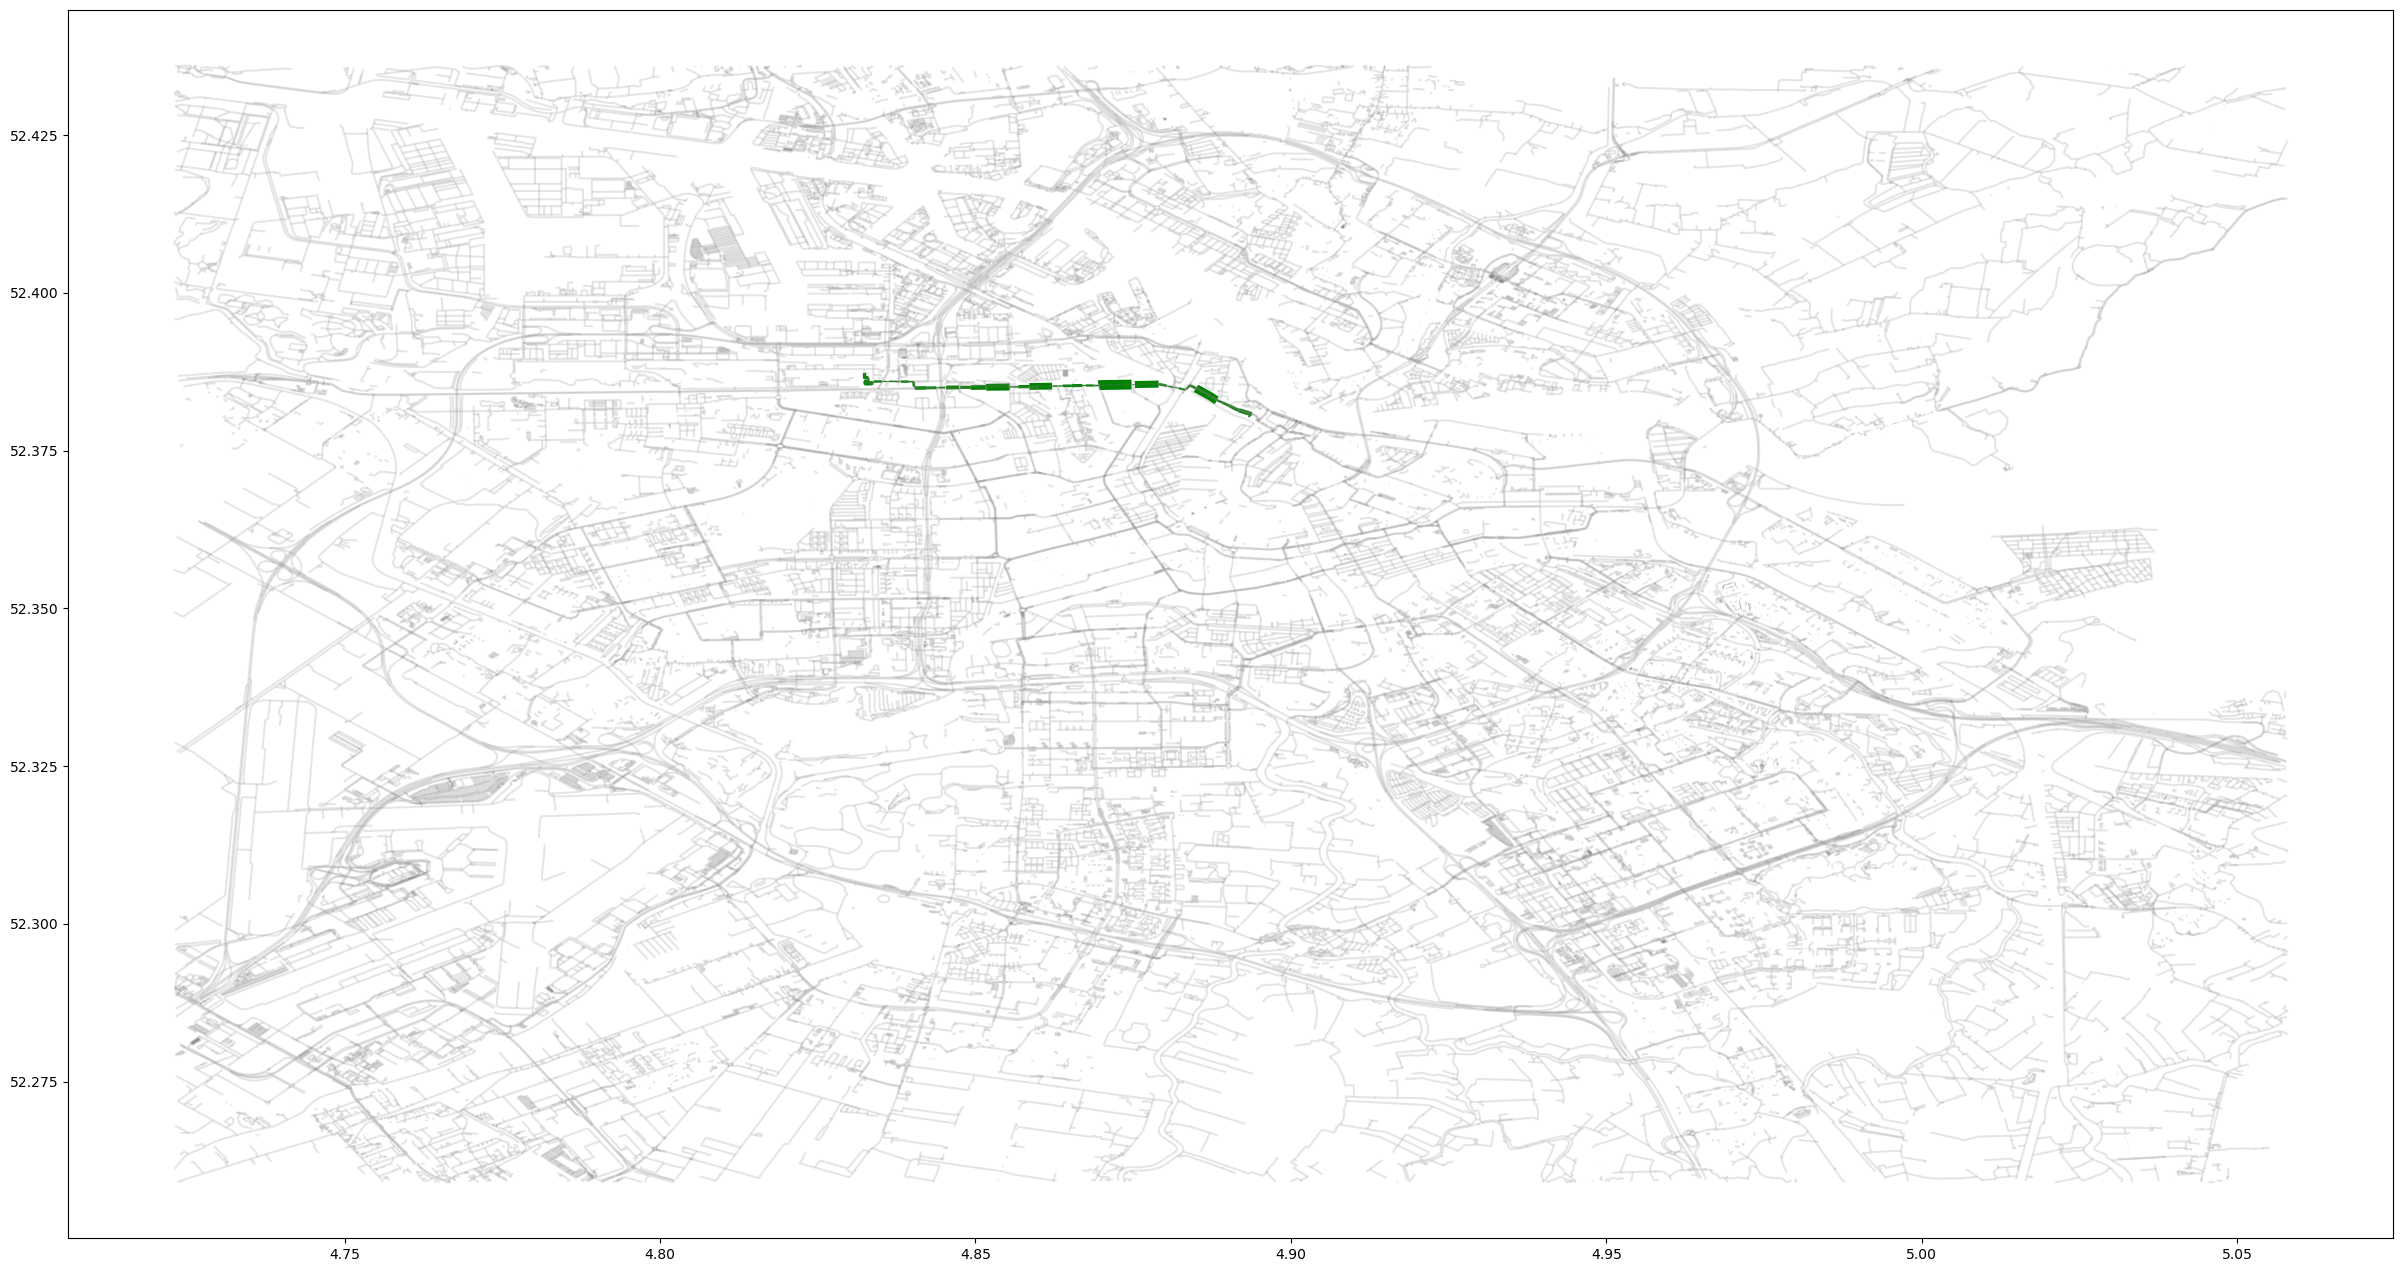

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(bus_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(bus_short_path_edges_s_e.copy()).plot(ax=ax, zorder=1, linewidth=(bus_short_path_edges_s_e.weights/50), color='green')

In [53]:
type(bus_short_path_edges_s_e)

pandas.core.frame.DataFrame

<Axes: >

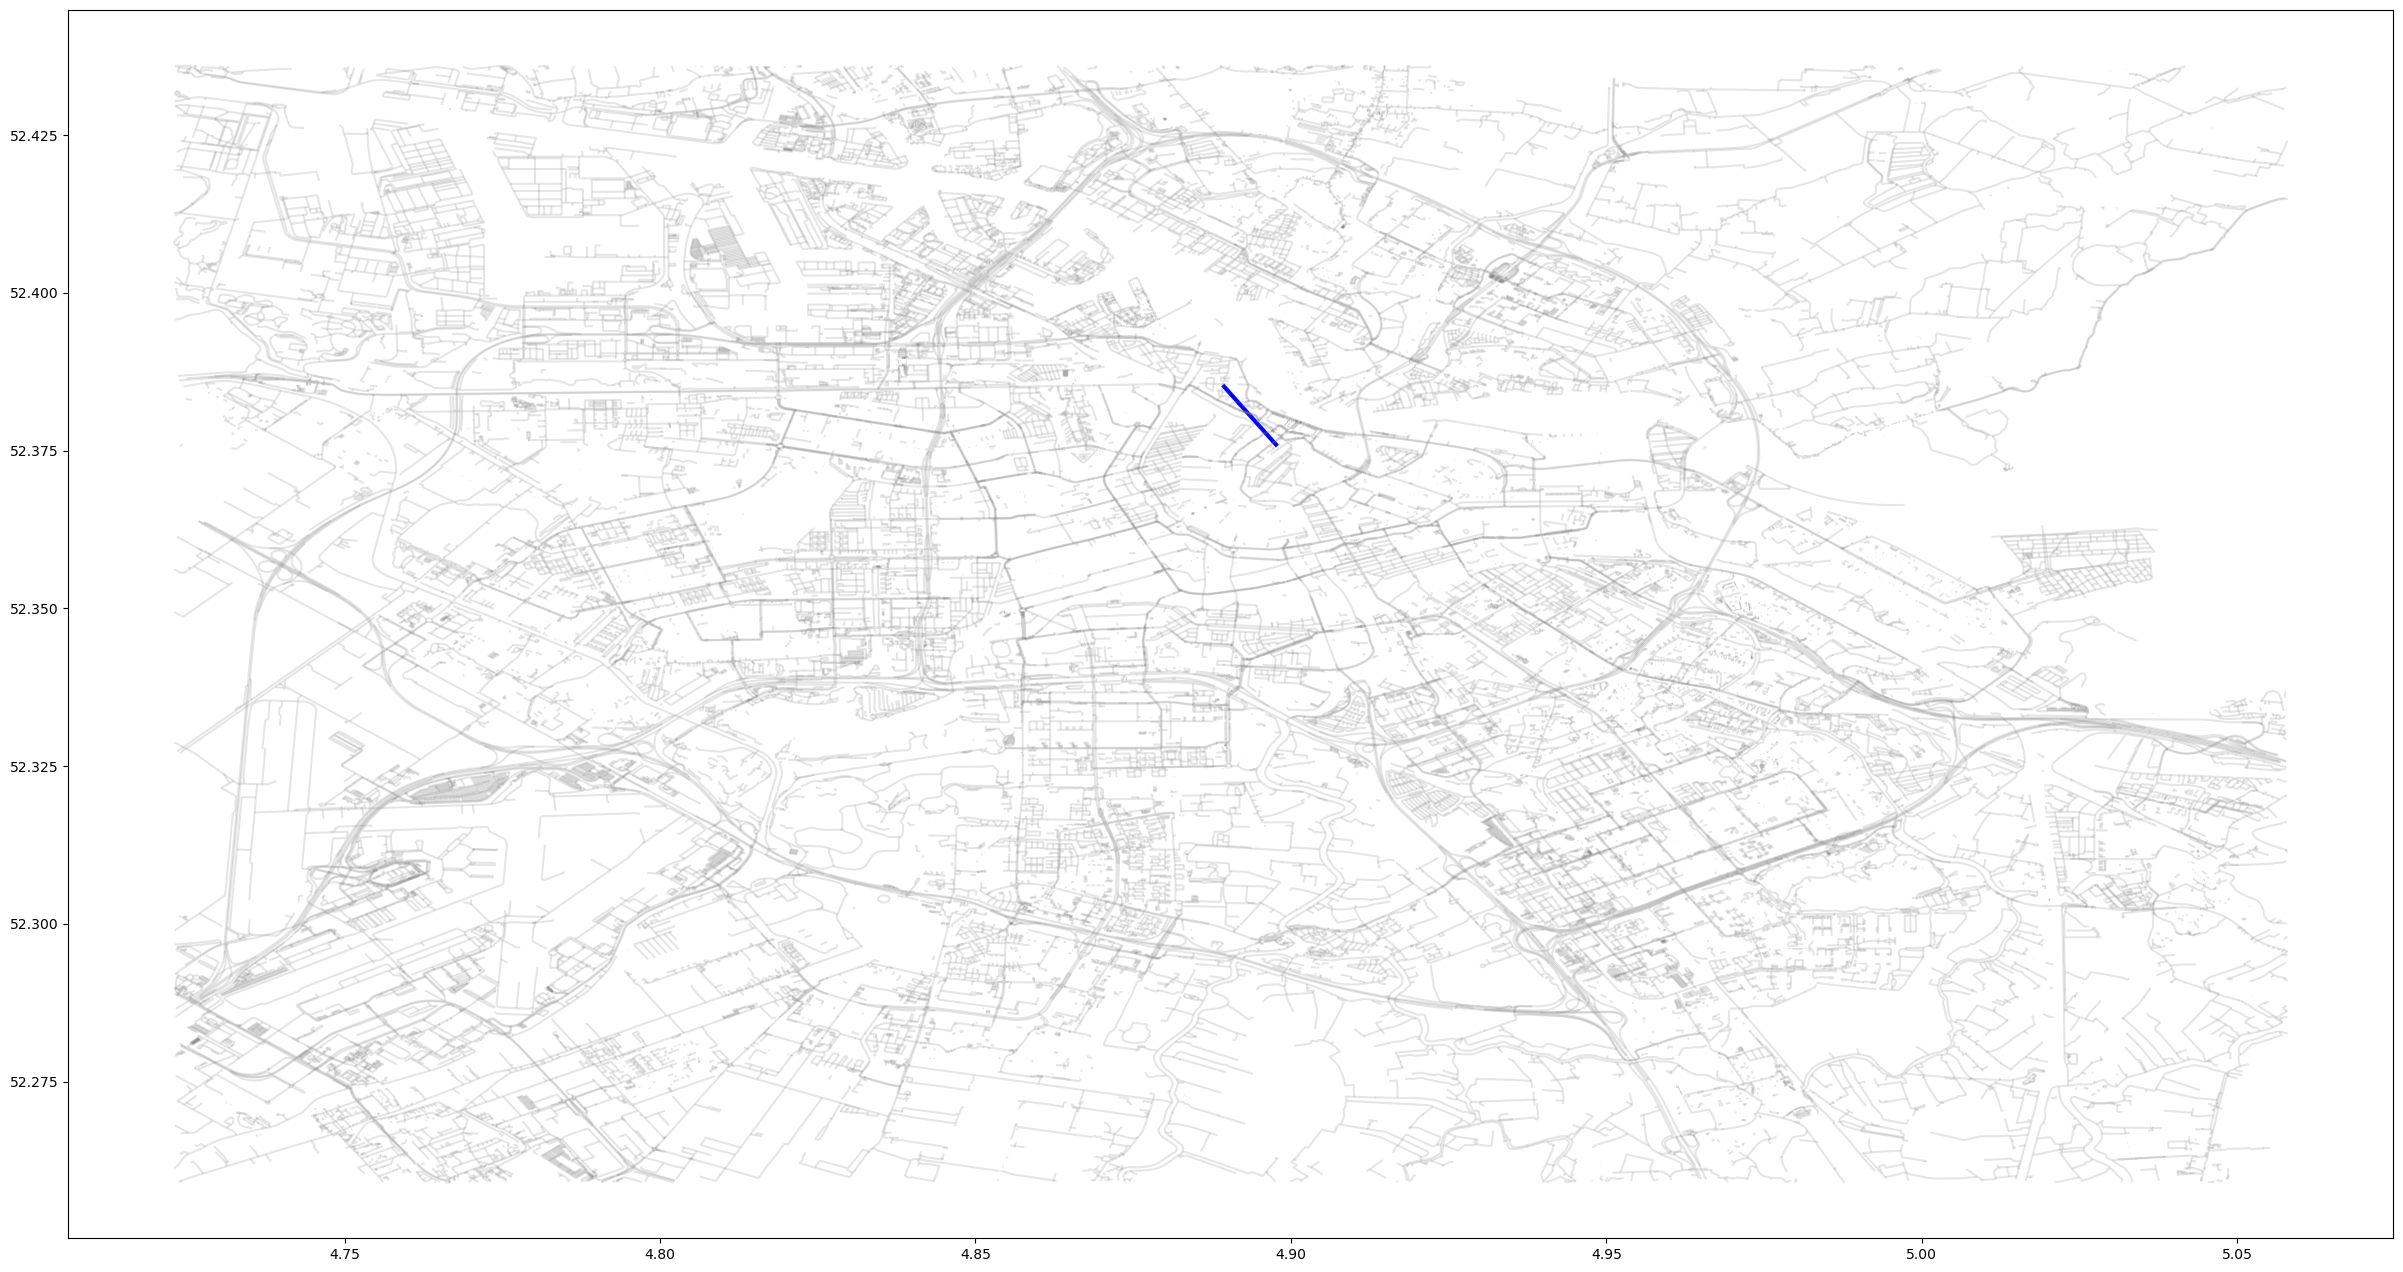

In [61]:
bus_short_path_edges_s_e0 = bus_short_path_edges_s_e.iloc[[0]]
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(bus_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(bus_short_path_edges_s_e0).plot(ax=ax, zorder=1, linewidth=(bus_short_path_edges_s_e0.weights) * 1, color='blue')

# Subway

In [5]:
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

In [6]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 1579/1579 [00:00<00:00, 8450.30it/s]


In [7]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

osm_id   route                       to  \
0    2785672  subway         Vlaardingen West   
1    2785673  subway                Binnenhof   
2   11174054  subway         Schiedam Centrum   
3   11174055  subway                Binnenhof   
4   11174056  subway                Binnenhof   
5   11174057  subway           Kralingse Zoom   
6    2785674  subway  Hoek van Holland Strand   
7    2785675  subway               Nesselande   
8   11171043  subway          Steendijkpolder   
9   11171044  subway               Nesselande   
10   2785676  subway                  De Terp   
11   2785677  subway                De Akkers   
12   2785504  subway       Rotterdam Centraal   
13   2785505  subway                De Akkers   
14   2777286  subway                   Slinge   
15   2777287  subway        Den Haag Centraal   

                                              name ref         network  \
0           Metro A: Binnenhof => Vlaardingen West   A  Rail Rotterdam   
1           Metro A: Vlaardingen West => Binnenhof   A  Rail Rotterdam   
2           Metro A: Binnenhof => Schiedam Centrum   A  Rail Rotterdam   
3           Metro A: Schiedam Centrum => Binnenhof   A  Rail Rotterdam   
4             Metro A: Kralingse Zoom => Binnenhof   A  Rail Rotterdam   
5             Metro A: Binnenhof => Kralingse Zoom   A  Rail Rotterdam   
6   Metro B: Nesselande => Hoek van Holland Strand   B  Rail Rotterdam   
7   Metro B: Hoek van Holland Strand => Nesselande   B  Rail Rotterdam   
8           Metro B: Nesselande => Steendijkpolder   B  Rail Rotterdam   
9           Metro B: Steendijkpolder => Nesselande   B  Rail Rotterdam   
10                   Metro C: De Akkers => De Terp   C  Rail Rotterdam   
11                   Metro C: De Terp => De Akkers   C  Rail Rotterdam   
12        Metro D: De Akkers => Rotterdam Centraal   D  Rail Rotterdam   
13        Metro D: Rotterdam Centraal => De Akkers   D  Rail Rotterdam   
14            Metro E: Den Haag Centraal => Slinge   E  Rail Rotterdam   
15            Metro E: Slinge => Den Haag Centraal   E  Rail Rotterdam   

   service                                           geometry  
0     None  MULTILINESTRING ((4.53506 51.96028, 4.53508 51...  
1     None  MULTILINESTRING ((4.31574 51.90364, 4.31591 51...  
2     None  MULTILINESTRING ((4.53506 51.96028, 4.53508 51...  
3     None  MULTILINESTRING ((4.53315 51.92146, 4.53316 51...  
4     None  MULTILINESTRING ((4.53315 51.92146, 4.53316 51...  
5     None  MULTILINESTRING ((4.53506 51.96028, 4.53508 51...  
6     None  MULTILINESTRING ((4.58655 51.98043, 4.58658 51...  
7     None  MULTILINESTRING ((4.10702 51.98639, 4.10550 51...  
8     None  MULTILINESTRING ((4.58655 51.98043, 4.58658 51...  
9     None  MULTILINESTRING ((4.22415 51.93300, 4.22418 51...  
10    None  MULTILINESTRING ((4.31898 51.83329, 4.31899 51...  
11    None  MULTILINESTRING ((4.59945 51.93557, 4.59948 51...  
12    None  MULTILINESTRING ((4.31898 51.83329, 4.31899 51...  
13    None  MULTILINESTRING ((4.47052 51.92395, 4.47044 51...  
14    None  MULTILINESTRING ((4.32649 52.07994, 4.32529 52...  
15    None  MULTILINESTRING ((4.47052 51.92395, 4.47044 51...

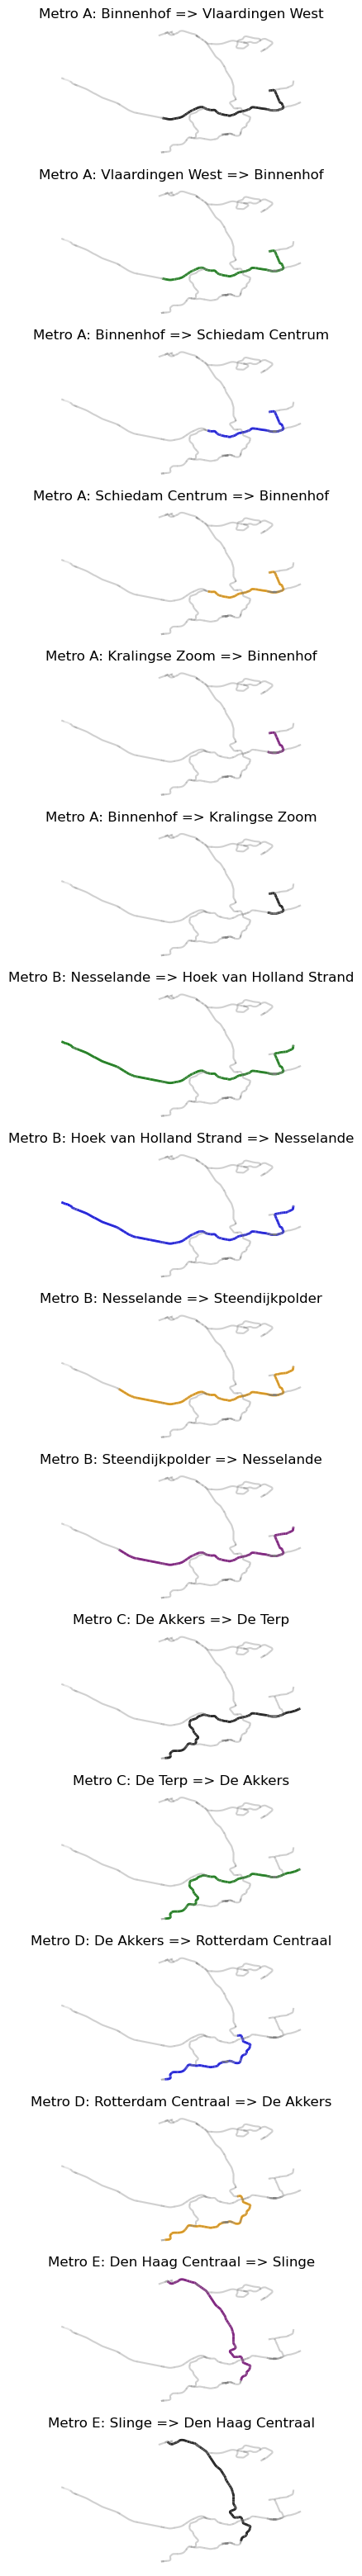

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [10]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [11]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [12]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [13]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [14]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [15]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges, aggregation_functions, edges)

In [16]:
sub_path_s_e, sub_length_s_e, sub_short_path_edges_s_e, sub_start_end_points_coordinates_pairs, sub_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, sub_new_edges, sub_new_nodes)

In [17]:
sub_short_path_edges

Empty DataFrame
Columns: [osm_id, geometry, railway, service, id_x, from_id, to_id, distance, time, weights, to_from, from_to, id_y, count_weight, route_name_list, ref, route]
Index: []

In [18]:
sub_distance_s_s_tuple, sub_distance_e_e_tuple = walking_linear_distance(sub_start_end_points_coordinates_pairs,sub_start_end_nearest_id_pairs, sub_new_nodes)

In [19]:
sub_distance_s_s_tuple

48331.74885128405

In [20]:
sub_distance_e_e_tuple

52520.45155630073

In [21]:
choosesub_using_time_tuple = transfer_using_time(sub_short_path_edges_s_e, sub_distance_s_s_tuple, sub_distance_e_e_tuple)

In [22]:
choosesub_using_time_tuple

(20.170440081516958, 1210, 0.0, 20.170440081516958)

In [23]:
choosesub_using_time_tuple[1]

1210

# Tram

In [24]:
tram_stations, tram_edges, tram_nodes, tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2741/2741 [00:00<00:00, 8592.17it/s]


In [25]:
tram_routes = tram_routes.loc[tram_routes.ref != 'EMA']

In [26]:
tram_routes, check_name = check_tram_routes(tram_stations, tram_routes)

In [27]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

tram_stations, tram_routes, check_name = recheck_tram_routes(replacement_dict, tram_stations, tram_routes)

In [28]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}
tram_stations, tram_routes, check_name = recheck_tram_routes(replacement_dict, tram_stations, tram_routes)

In [29]:
tram_order_route_dict, tram_shortest_path_pairs, tram_shortest_path_edges, tram_edges_dict = tram(tram_stations, tram_edges, tram_nodes, tram_routes, city='Amsterdam')

AttributeError: 'int' object has no attribute 'name'

In [ ]:
tram_shortest_path_edges

In [ ]:
tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(tram_order_route_dict, tram_routes)

In [ ]:
aggregation_functions_nodes = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [ ]:
tram_new_nodes = add_columns_to_nodes(tram_order_route_dict, aggregation_functions_nodes, tram_nodes)

In [ ]:
tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(tram_shortest_path_edges, tram_routes)

In [ ]:
tram_shortest_path_edges

In [ ]:
aggregation_functions_edges = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [ ]:
tram_edges

In [ ]:
tram_new_edges = add_columns_to_edges(tram_shortest_path_edges, aggregation_functions_edges, tram_edges)

In [ ]:
tram_new_edges

In [ ]:
tram_path_s_e, tram_length_s_e, tram_short_path_edges_s_e,tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, tram_new_edges, tram_new_nodes)

In [ ]:
tram_distance_s_s_tuple, tram_distance_e_e_tuple = walking_linear_distance(tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs,tram_new_nodes)

In [ ]:
tram_distance_s_s_tuple

In [ ]:
tram_distance_e_e_tuple

In [ ]:
chosentram_using_time_tuple = transfer_using_time( tram_short_path_edges_s_e,tram_distance_s_s_tuple, tram_distance_e_e_tuple)

In [48]:
chosentram_using_time_tuple

(0.2606768663240623, 16, 0.13543237628288057, 0.1252444900411817)

# Compare

In [67]:
dict_fastest = compare_using_time_stb(choosesub_using_time_tuple, sub_new_edges, sub_short_path_edges, chosentram_using_time_tuple, tram_new_edges, tram_short_path_edges,choosebus_using_time_tuple,bus_new_edges,bus_short_path_edges)

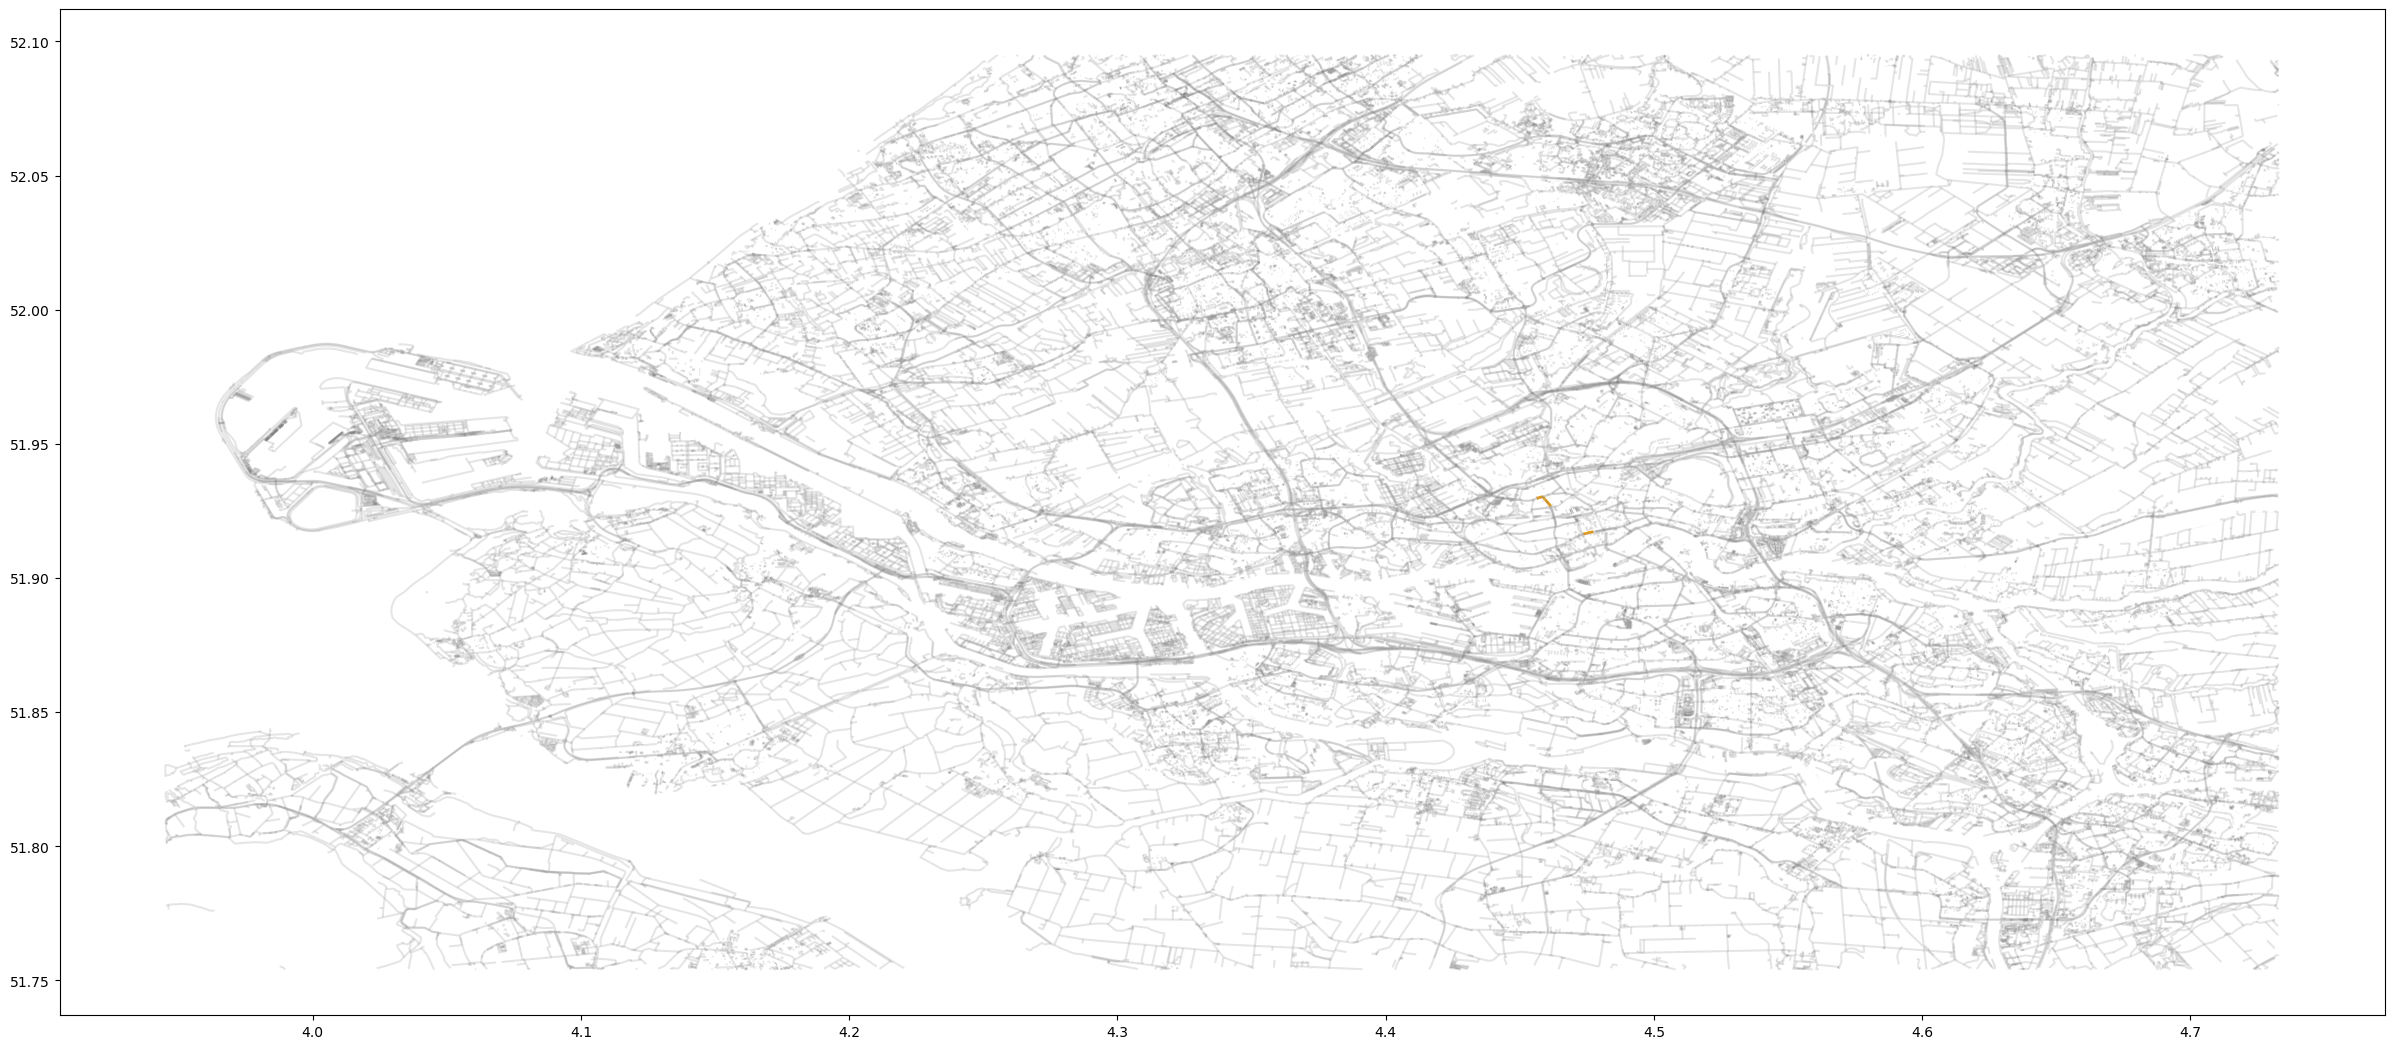

In [68]:
plot_chosen_route(dict_fastest)

In [ ]:
def compare_using_time(choosesub_using_time_tuple, sub_new_edges, sub_short_path_edges,
                       choosetram_using_time_tuple, tram_new_edges, tram_short_path_edges,
                       choosebus_using_time_tuple, bus_new_edges, bus_short_path_edges):
    
    using_time_subway = choosesub_using_time_tuple[1]
    using_time_tram = choosetram_using_time_tuple[1]
    using_time_bus = choosebus_using_time_tuple[1]
    
    min_using_time = min(using_time_subway, using_time_tram, using_time_bus)

    if min_using_time == using_time_subway:
        dict_fastest = {'using_time': using_time_subway,
                 'new_edges': sub_new_edges,
                 'shortest_path_edges': sub_short_path_edges
                }
    elif min_using_time == using_time_tram:
        dict_fastest = {'using_time': using_time_tram,
                 'new_edges': tram_new_edges,
                 'shortest_path_edges': tram_short_path_edges
                }
    else:
        dict_fastest = {'using_time': using_time_bus,
                 'new_edges': bus_new_edges,
                 'shortest_path_edges': bus_short_path_edges
                }

    return dict_fastest

In [ ]:
def plot_chosen_route(dict_fastest):

    fig, ax = plt.subplots(1, 1, figsize=(30, 20))

    gpd.GeoDataFrame(dict_fastest['new_edges'].copy()).plot(ax=ax, color='gray', alpha=0.2)
    gpd.GeoDataFrame(dict_fastest['short_path_edges'].copy()).plot(ax=ax, zorder=1, linewidth=(dict_fastest['short_path_edges'].count_weight) * 2, color='orange')